# General figures for the paper

-Venn diagram of disease positive animals
-Counts of LB test responses
-Dendrogram of control and non control animals clusters by LBTEST responds

In [130]:
from send import send_db
import os, math
import pandas as pd, numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

In [131]:
data = pd.read_csv('../workflow_notebooks/data/RAT/RAT_training_data.csv', index_col=0)

/hive/Anaconda3-2020.02/envs/cheminformatics/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [132]:
steatosis = set(data.USUBJID[data['STEATOSIS'] == 1])
cholestasis = set(data.USUBJID[data['CHOLESTASIS'] == 1])
necrosis = set(data.USUBJID[data['NECROSIS'] == 1])

### Venn Diagram

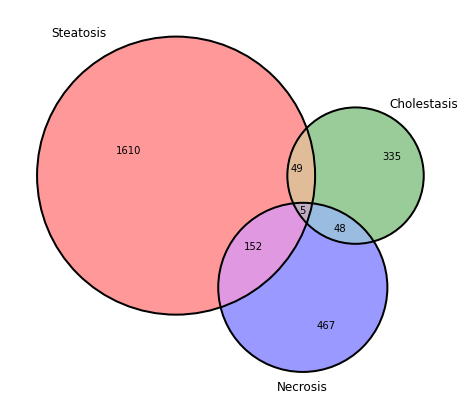

In [133]:
plt.figure(figsize=(8, 8))

v = venn3(subsets=[steatosis, cholestasis, necrosis],
          set_labels=('Steatosis', 'Cholestasis', 'Necrosis'))

venn3_circles(subsets=[steatosis, cholestasis, necrosis])

plt.savefig(os.path.join('figures', 'venn.png'), transparent=True)

### LB Counts

/hive/Anaconda3-2020.02/envs/cheminformatics/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


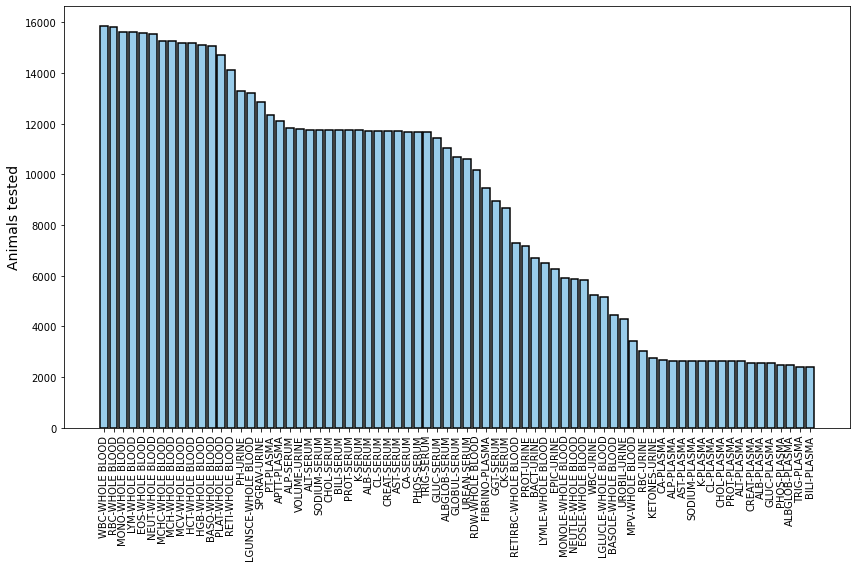

In [134]:
tests = data[[col for col in data.columns if '-' in col]].notnull().sum().sort_values(ascending=False)
tests = tests[tests > 2000]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(tests.index, tests.values, facecolor=(0, 0.5, 0.8, 0.4), edgecolor='k', linewidth=1.5)
ax.set_xticklabels(list(tests.index), rotation='vertical')
ax.set_ylabel("Animals tested", fontsize=14)

plt.tight_layout()
plt.savefig(os.path.join('figures', 'nulls.png'), transparent=True)

## Dendrogram 

First process the data as we do prrior to machine learning.  I.e., standardizing and logtransforming.  

In [135]:
srted_tests = data.notnull().sum().sort_values(ascending=False)

good_tests = data.columns[(data.notnull().sum() / data.shape[0]) > 0.4]
good_tests = good_tests[~good_tests.isin(['USUBJID', 'STUDYID', 'SEX', 'STEATOSIS',
                                         'CHOLESTASIS', 'NECROSIS', 'SPECIES', 'IS_CONTROL',
                                         'BWDIFF', 'BWSLOPE', 'BWINTCEPT', 'MISTRESC'])]

In [136]:
(tests / data.shape[0] > 0.4).sum()

44

In [137]:
min_response_value = 0.4


df = data.replace(np.inf, np.nan)


good_tests = df.columns[(df.notnull().sum() / df.shape[0]) > min_response_value]
good_tests = good_tests[~good_tests.isin(['USUBJID', 'STUDYID', 'SEX', 'STEATOSIS',
                                         'CHOLESTASIS', 'NECROSIS', 'SPECIES', 'IS_CONTROL',
                                         'BWDIFF', 'BWSLOPE', 'BWINTCEPT', 'MISTRESC'])]

df = df[good_tests]
df = df.apply(lambda x: x + abs(x.min()) + 1)
df = df.applymap(math.log10)

df.index = data.USUBJID

scaler = StandardScaler()



df = df.fillna(df.mean())
df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

df.head()

,ALB-SERUM,ALBGLOB-SERUM,ALP-SERUM,ALT-SERUM,APTT-PLASMA,AST-SERUM,BASO-WHOLE BLOOD,BILI-SERUM,CA-SERUM,CHOL-SERUM,...,RETIRBC-WHOLE BLOOD,SODIUM-SERUM,SPGRAV-URINE,TRIG-SERUM,UREAN-SERUM,VOLUME-URINE,WBC-WHOLE BLOOD,BWDIFF_NORM,BWSLOPE_NORM,BWINTCEPT_NORM
USUBJID,,,,,,,,,,,,,,,,,,,,,
0436RA140_001-4201,0.202789,-0.116292,-0.498723,-0.454608,8.771111e-14,-0.382498,0.814173,-0.243798,0.201633,-1.054498,...,-0.138179,0.312294,1.210959,-0.391369,0.231912,1.448126e-14,0.787130,0.103419,0.144428,0.841787
0436RA140_001-4202,-0.229870,-0.116292,-0.498723,-0.932984,8.771111e-14,-0.733379,-0.824371,-0.438032,-0.884264,-0.615092,...,-0.030921,-0.309669,-0.052634,0.669787,-0.607666,1.448126e-14,-0.343059,0.203184,0.188971,0.794798
0436RA140_001-4203,0.629489,-0.116292,0.394745,-0.261184,8.771111e-14,0.033222,0.553604,-0.056759,0.605093,0.045784,...,-1.811631,-0.309669,0.822733,0.255440,0.231912,1.448126e-14,0.368605,-0.034567,-0.034770,-0.040090
0436RA140_001-4204,-0.229870,-0.116292,0.444317,0.282846,8.771111e-14,-0.130181,-0.824371,0.123598,-1.021038,0.203619,...,-0.246558,-0.933114,0.336737,-0.889860,-0.900309,1.448126e-14,-0.189997,-0.160832,-0.165870,-1.526675
0436RA140_001-4205,-0.229870,-0.116292,0.444317,-0.792194,8.771111e-14,-0.048013,-0.412313,-0.243798,-1.240362,-0.572320,...,-0.767875,-0.309669,0.044757,0.436553,0.231912,1.448126e-14,-1.150006,-0.110231,-0.092947,0.274589


### Dendrogram with full 17,285 animals

/hive/Anaconda3-2020.02/envs/cheminformatics/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator


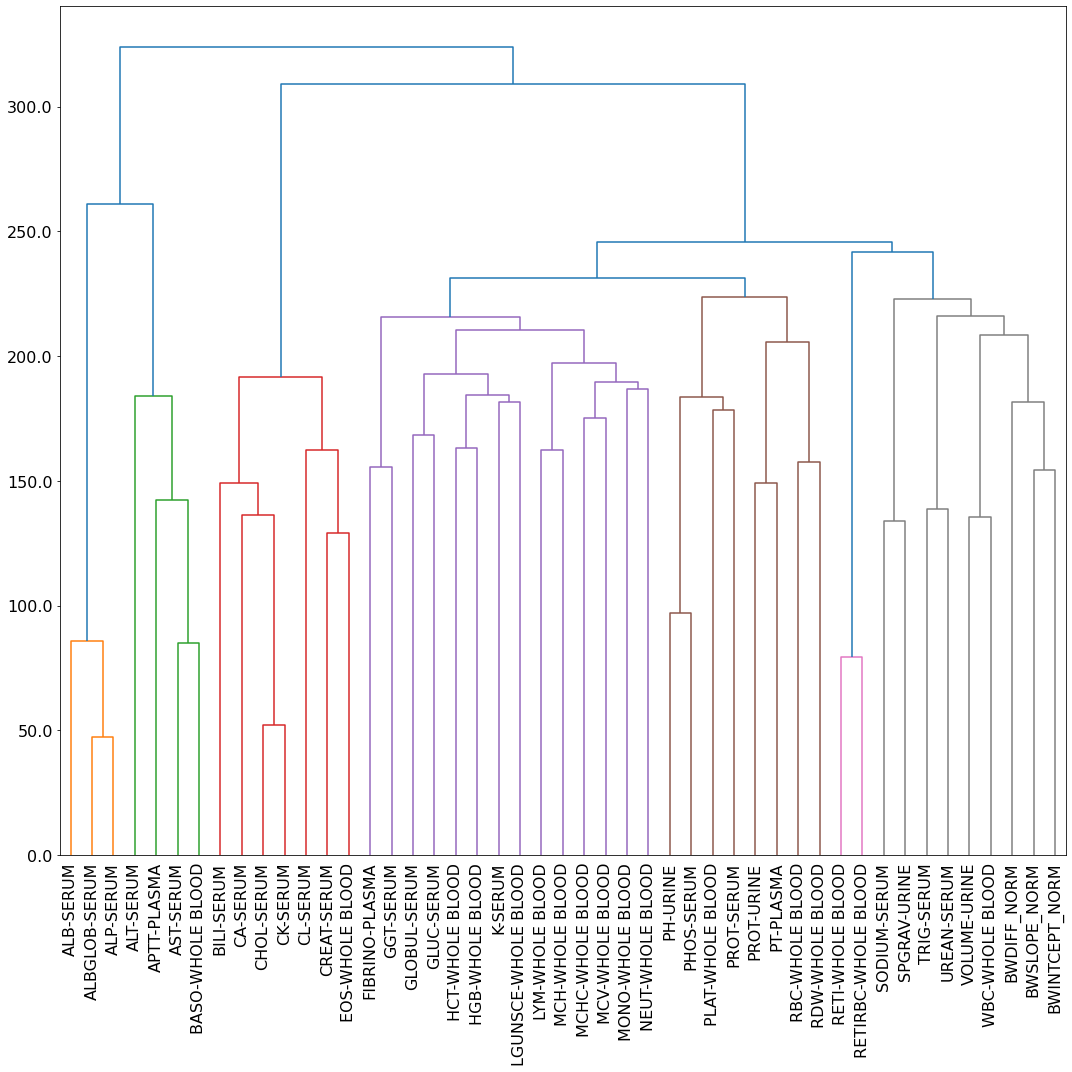

In [144]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = df.T

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)


fig, ax = plt.subplots(figsize=(15, 15))

plot_dendrogram(model, ax=ax)

ax.set_xticklabels(X.index, fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)

plt.tight_layout()
plt.savefig(os.path.join('figures', 'dendrogram_full.png'), transparent=True)

### Dendrogram with just control animals

/hive/Anaconda3-2020.02/envs/cheminformatics/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


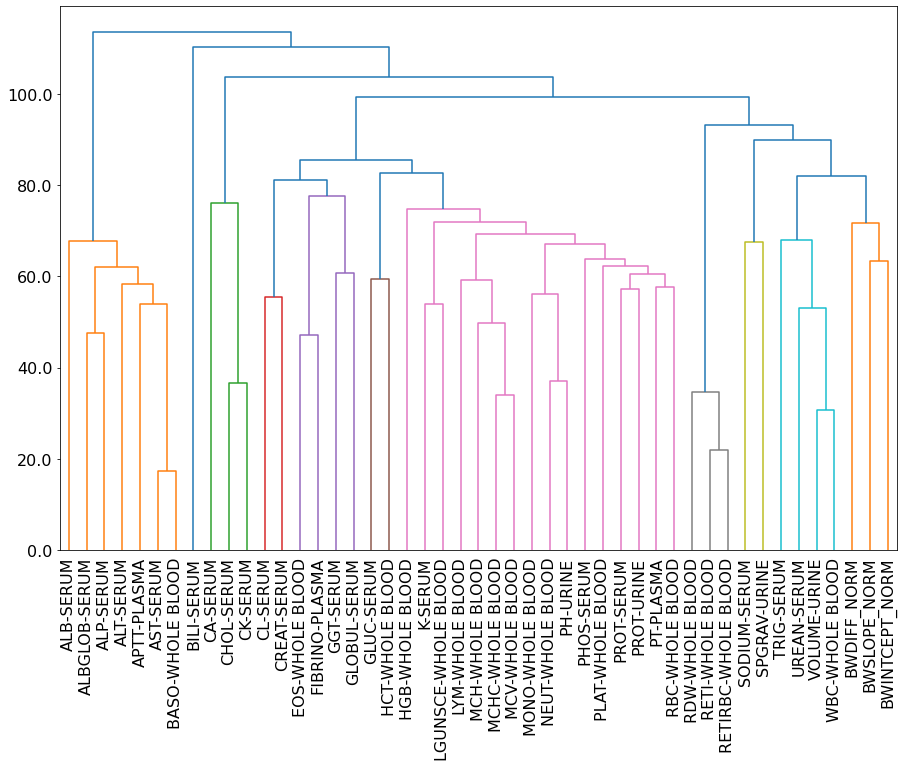

In [139]:

control_animals = data.USUBJID[data.IS_CONTROL]

X_control = df[df.index.isin(control_animals)].T

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_control)


fig, ax = plt.subplots(figsize=(15,10))

plot_dendrogram(model, ax=ax)

ax.set_xticklabels(X.index, fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)


plt.savefig(os.path.join('figures', 'dendrogram_control.png'), transparent=True)